# 1. Import Library

In [290]:
import pandas as pd #Proses data atau membantu kita bekerja dengan data
import matplotlib.pyplot as plt # Data visualisasi
from sklearn.preprocessing import LabelEncoder #Mengubah kategori variabel non-numerik
import seaborn as sns # Untuk statisti Visualisasi

# 2. Load dataset

In [291]:
url = 'https://raw.githubusercontent.com/Rosdiana13/Ros_Diana-0706022210049-Week6/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)
df.sample(n=10)

# Menapilkan data yang ada di dalam dataframe.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
417,4,144,82,32,0,38.5,0.554,37,1
374,2,122,52,43,158,36.2,0.816,28,0
524,3,125,58,0,0,31.6,0.151,24,0
49,7,105,0,0,0,0.0,0.305,24,0
10,4,110,92,0,0,37.6,0.191,30,0
257,2,114,68,22,0,28.7,0.092,25,0
145,0,102,75,23,0,0.0,0.572,21,0
655,2,155,52,27,540,38.7,0.240,25,1
400,4,95,64,0,0,32.0,0.161,31,1
132,3,170,64,37,225,34.5,0.356,30,1


## Exploratory Data Analysis

In [292]:
df.shape # Untuk melihat jumlah baris dan kolum

(768, 9)

In [293]:
df.head() # Untuk menampilkan 5 data pertama

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [294]:
df.info()

# Untuk memlihat infomasi dari masing-masing kolum pada dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [295]:
df.dropna(inplace=True)
df.isnull().sum()

# Untuk melihat jumlah data yang hilang dalam data, dan jika ada yang nan akan di drop

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [296]:
df.describe()

#Untuk Menapilkan data statistik dari masing-masing Kolum

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [297]:
col_names = ['Pregnancies','Outcome']

for col in col_names:
    print(df[col].value_counts())

# Untuk melihat jumlah masing-masing Distribusi frekuensi nilai dalam kolum.
# Alasan kenapa saya hanya mengambil 2 kolum kerena kedua kolum tersebut datanya mempunya perulangan value atau unique.
# Yang masing-masing value akan dihitung jumlahnya ada berapa seperti 1 jumlah value 135. 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
0    500
1    268
Name: Outcome, dtype: int64


In [298]:
outcome_map = {1: "True", 0: "False"}
df['Outcome'] = df['Outcome'].map(outcome_map)

# Disini Aku menganti value kolum Outcome yang 1 = Trus dan 0 = False biar kalau di visualisasikan gampang keliahatan

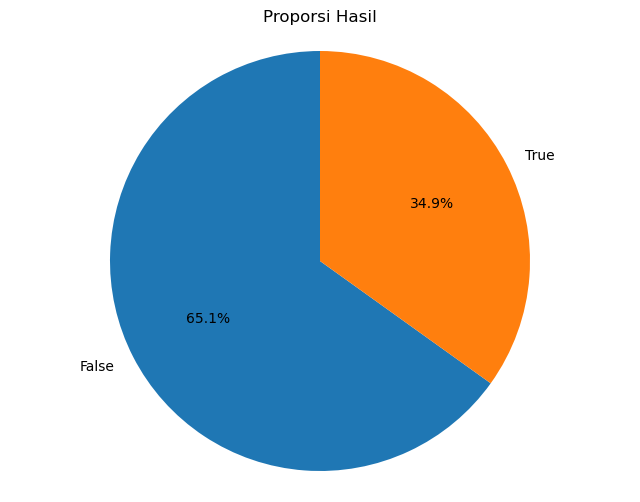

In [299]:
species_counts = df['Outcome'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Hasil')
plt.axis('equal')
plt.show()

# Dapat dilihat dari diagram dibawa, bahwa dari data indian diabets database teridetifikasi
#  jumlah yang tidak terkena diabetes sebesar 65.1% sedangkan 
# 34.9% terindetifikasi terkena penyakit diabetes berdasarkan data. 

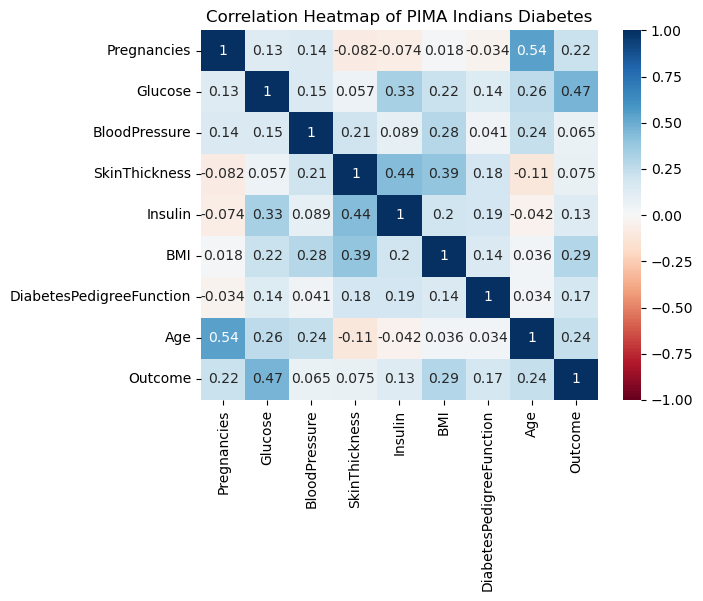

In [300]:
label_encoder = LabelEncoder()

df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

# Aku ubah kembali Outcom menjadi numerik agar bisa di vesualisasikan
# di Heatmat. Kalau tidak di ubah menjadi numerik kita gak bakal tau 
# hubungan masing-masing setiap kolum.

plt.Figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='RdBu',
vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap of PIMA Indians Diabetes')
plt.show()

# Untuk mengetahui hubungan masing-masing kolum 

Dari heatmap ini, terlihat bahwa fitur Glucose, BMI, Age, dan Pregnancies memiliki korelasi positif yang cukup signifikan dengan diabetes (Outcome). Oleh karena itu, fitur-fitur ini mungkin berkontribusi lebih besar dalam model prediktif untuk diabetes daripada fitur lainnya, seperti BloodPressure atau DiabetesPedigreeFunction, yang memiliki korelasi yang lebih rendah dengan Outcome.

In [301]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Indetifkasi / penentuan Independen dan dependen

In [302]:
# Split X and Y into training and testing sets

from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
X_train.shape, X_test.shape

# Untuk melihat ada berapa sampel dan ada berapa fitur dalam
# X_train dan X_test

((614, 8), (154, 8))

# Decision Tree Classifier

In [304]:
# Import DecisionTreeClassifier
from sklearn.tree import  DecisionTreeClassifier

1. Gini

In [305]:
# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

#fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

2. Entropy

In [306]:
# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [307]:
# Predict the test set results

# With Criterion gini index
y_pred_gini = clf_gini.predict(X_test)

# With Criterion entropy index
y_pred_en = clf_entropy.predict(X_test)

In [308]:
# Check Accurascy score

# With criterion gini index
from sklearn.metrics import  accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
print('Model accuracy score with criterion entropy index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))



Model accuracy score with criterion gini index: 0.7597
Model accuracy score with criterion entropy index: 0.7662


In [309]:
# Check for overfitting and underfitting

# With criterion gini index
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

# With criterion entropy index
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Training set score: 0.7769
Test set score: 0.7597
Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(0.875, 0.375, 'x[1] <= 165.5\ngini = 0.4\nsamples = 163\nvalue = 

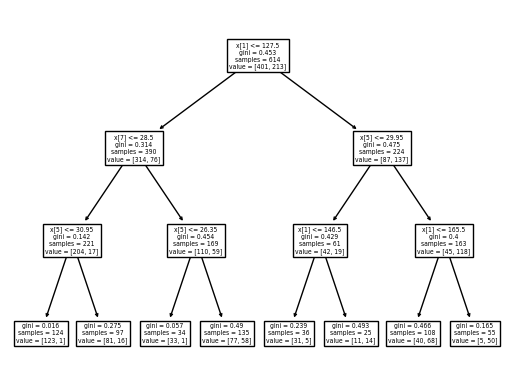

In [310]:
# Visualize decision Trees

# With criteria gini
plt.Figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) # Visualisasi

[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples = 28\nvalue = [13, 15]'),
 Text(0.875, 0.375, 'x[1] <= 165.5

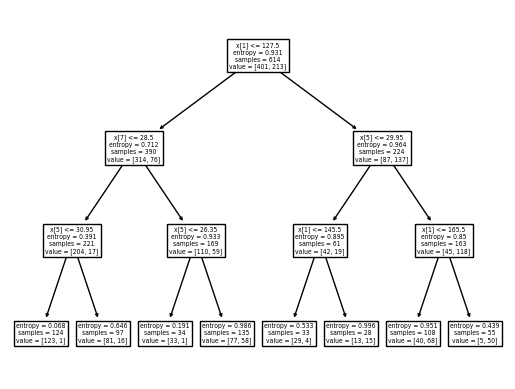

In [311]:
# Visualize decision Trees

# With criteria gini
plt.Figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, y_train))

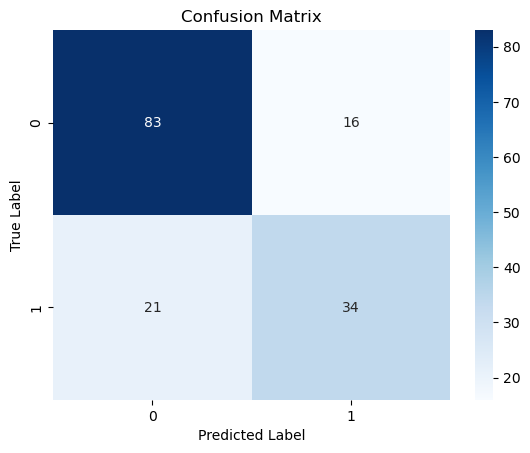

In [312]:
# Confusion matrix

# With creterion gini
from sklearn.metrics import  confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

plt.Figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

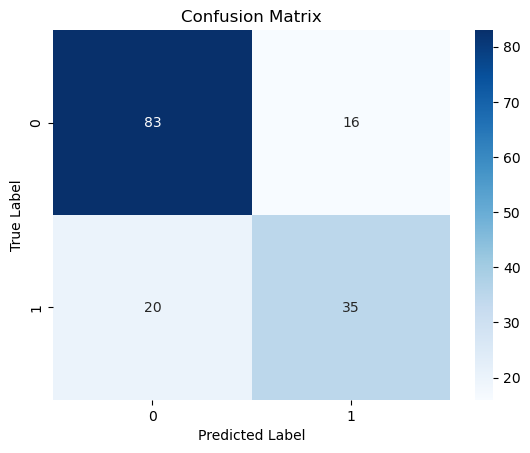

In [313]:
# Confusion matrix

# With creterion entropy
from sklearn.metrics import  confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

plt.Figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [314]:
from sklearn.metrics import  classification_report
# Classification Report Gini
print(classification_report(y_test, y_pred_gini))

# Classification Report Gini
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



## Naive Bayes


In [315]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [316]:
nb_y_pred = nb_classifier.predict(X_test)

In [317]:

print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.7662


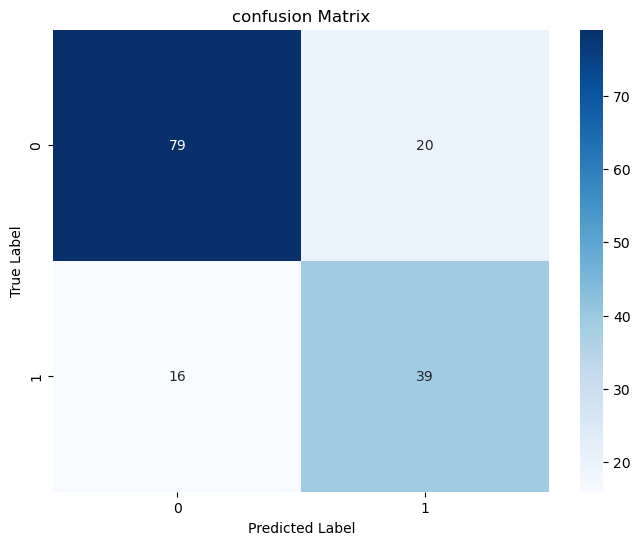

In [318]:
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [319]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# KNN

In [320]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [321]:
kn_y_pred = nb_classifier.predict(X_test)

In [322]:

print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, kn_y_pred)))

Model accuracy score with Naive Bayes: 0.7662


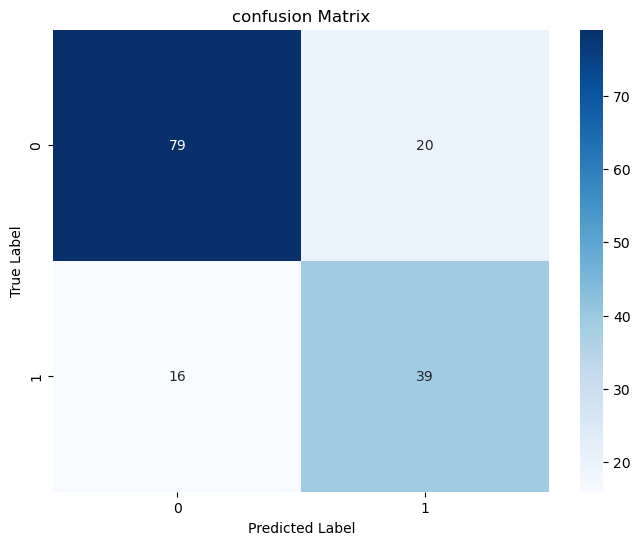

In [323]:
cm = confusion_matrix(y_test, kn_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [324]:
print(classification_report(y_test, kn_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## Kesimpulan 

KNN tampaknya lebih seimbang dalam performa antarkelas.
Naive Bayes dan Decision Tree lebih baik jika tujuannya adalah mendeteksi satu kelas tertentu lebih akurat.